In [1]:
import matplotlib.pyplot as plt
import torchvision.models as models

In [2]:
# Load a pre-trained ResNet model
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
model.layer1[1]

BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [4]:
w = model.layer1[1].conv2.weight.detach().numpy()
w, w.shape

(array([[[[-2.15736944e-02, -4.56877612e-03,  4.54826839e-03],
          [-8.18700157e-03,  4.17396091e-02,  2.30097380e-02],
          [-8.92831944e-03,  5.73524870e-02,  2.98175104e-02]],
 
         [[ 5.86268455e-02,  4.28643003e-02,  4.49118093e-02],
          [ 2.22811848e-02, -1.29687358e-02,  7.60985678e-03],
          [ 4.53731492e-02,  3.07118278e-02,  3.77001762e-02]],
 
         [[-1.54556390e-02, -3.86916474e-02, -4.60102297e-02],
          [-2.31234506e-02,  2.82932185e-02,  4.77903010e-03],
          [-2.03282852e-02,  1.37558021e-02,  2.58830898e-02]],
 
         ...,
 
         [[ 5.13015799e-02,  4.22913469e-02,  5.78327626e-02],
          [ 4.52101678e-02,  5.58501221e-02,  1.43180275e-02],
          [ 1.42407212e-02,  1.79684591e-02,  1.43439155e-02]],
 
         [[ 4.60116006e-03,  1.25661483e-02,  4.89306077e-02],
          [-6.57537114e-03, -2.64313556e-02,  1.58552732e-02],
          [ 1.31923566e-02,  1.90108605e-02,  1.38416048e-02]],
 
         [[ 6.19826950e-

In [5]:
def visualize_kernels(w, nn=8):
    n_row, n_col = int(w.shape[0] / nn), int(w.shape[1] / nn)
    plt.figure(figsize=[n_row, n_col])
    count = 0
    for i in range(n_row):
        for j in range(n_col):
            plt.subplot(n_row, n_col, count + 1)
            count += 1
            plt.imshow(w[i][j], cmap='gray')
            plt.axis('off')
    plt.show()

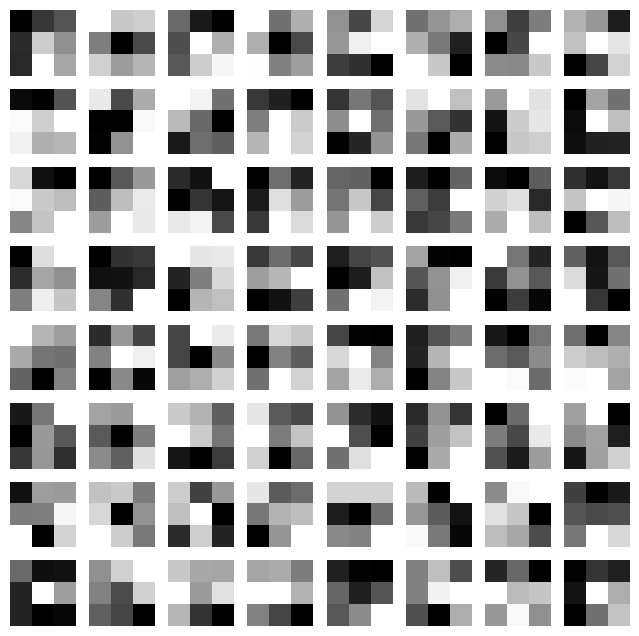

In [6]:
visualize_kernels(w, nn=8)

In [7]:
model.layer4[1]

BasicBlock(
  (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [8]:
w = model.layer4[1].conv2.weight.detach().numpy()
w, w.shape

(array([[[[ 2.87286908e-04,  4.26322874e-03, -2.02658121e-03],
          [ 1.95129833e-04,  2.43806234e-03, -5.86319854e-03],
          [ 4.48028697e-03,  8.65773112e-03,  8.55384802e-04]],
 
         [[-1.13350116e-02, -1.31945005e-02, -1.03047527e-02],
          [-4.95070824e-03, -4.58975276e-03, -3.10405251e-03],
          [-7.58828269e-03, -8.37949291e-03, -8.92388821e-03]],
 
         [[-1.19144060e-02, -1.21043455e-02, -1.01668639e-02],
          [-1.20933363e-02, -1.15574179e-02, -8.96002352e-03],
          [-1.25145568e-02, -9.32961050e-03, -6.40792120e-03]],
 
         ...,
 
         [[-9.35733318e-03, -1.06620416e-02, -1.26723303e-02],
          [-8.06002133e-03, -8.54234677e-03, -1.21209836e-02],
          [-8.14977102e-03, -8.80365260e-03, -1.06106680e-02]],
 
         [[ 4.26322874e-03,  5.64613240e-03,  2.84598209e-03],
          [ 4.70700813e-03,  6.25503762e-03,  7.58620305e-03],
          [ 1.15042478e-02,  1.15180081e-02,  1.07284952e-02]],
 
         [[-6.24553347e-

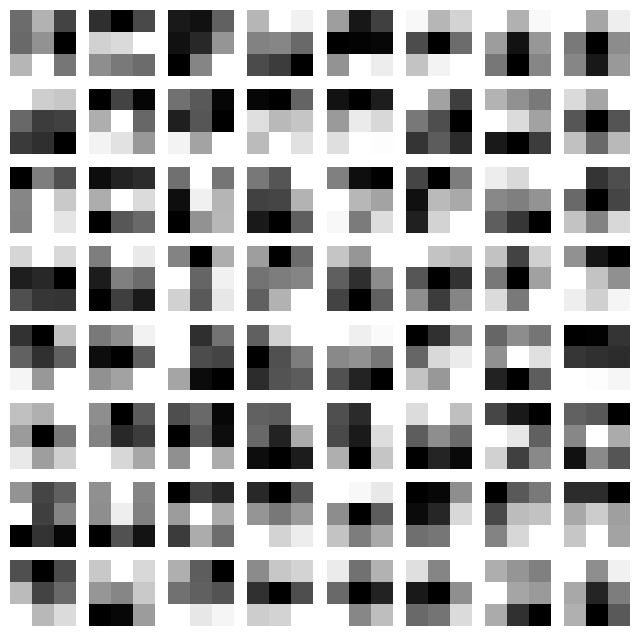

In [9]:
visualize_kernels(w, nn=64)